In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('stock_prices.csv')
prices = data['Close'].values.reshape(-1,1)

In [ ]:
sc = MinMaxScaler()
sc_price = sc.fit_transform(prices)

In [ ]:
def create_sequences(data, seq_l):
    X, y = [], []
    for i in range(len(data) - seq_l):
        X.append(data[i : i + seq_l])
        y.append(data[i + seq_l])
    return np.array(X), np.array(y)

In [ ]:
seq_l = 10
X,y = create_sequences(sc_price,seq_l)

In [ ]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [ ]:
model = Sequential([
    LSTM(50, input_shape=(seq_l, 1)),
    Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 0s 25ms/step - loss: 6.2912e-04 - val_loss: 0.0017
Epoch 2/50
13/13 [==============================] - 0s 16ms/step - loss: 6.3699e-04 - val_loss: 0.0017
Epoch 3/50
13/13 [==============================] - 0s 14ms/step - loss: 6.2657e-04 - val_loss: 0.0018
Epoch 4/50
13/13 [==============================] - 0s 20ms/step - loss: 6.4125e-04 - val_loss: 0.0018
Epoch 5/50
13/13 [==============================] - 0s 13ms/step - loss: 6.2414e-04 - val_loss: 0.0021
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 6.5419e-04 - val_loss: 0.0021
Epoch 7/50
13/13 [==============================] - 0s 10ms/step - loss: 6.9282e-04 - val_loss: 0.0017
Epoch 8/50
13/13 [==============================] - 0s 13ms/step - loss: 6.5382e-04 - val_loss: 0.0016
Epoch 9/50
13/13 [==============================] - 0s 14ms/step - loss: 6.1453e-04 - val_loss: 0.0017
Epoch 10/50
13/13 [==============================] - 0s 13ms/step - loss: 

In [ ]:
loss = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0017


In [ ]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


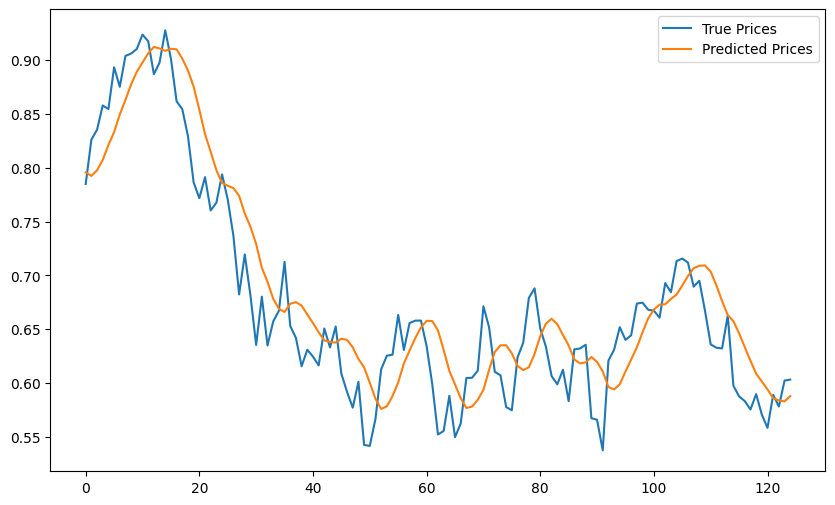

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()